<a href="https://colab.research.google.com/github/anapitalai/gee/blob/main/traditional_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [54]:
#type(pd.read_csv)
#help(pd.read_csv)

In [6]:
#data
data="/content/drive/MyDrive/2025/ml_training/gsd_data.csv"
pd_data=pd.read_csv(data)
pd_data.head()

,Flight_Height_m,GSD_m
0,50,0.022
1,75,0.033
2,100,0.041
3,125,0.050
4,150,0.062


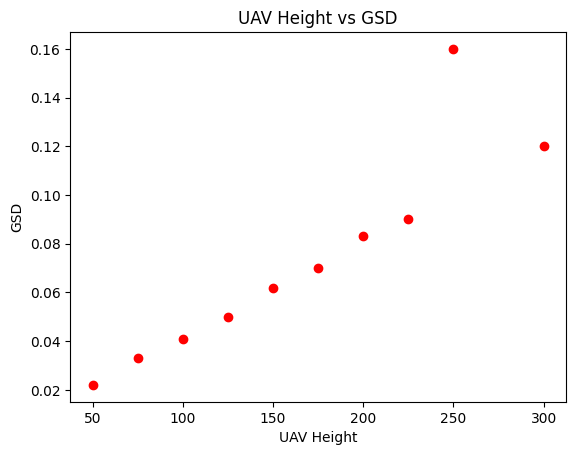

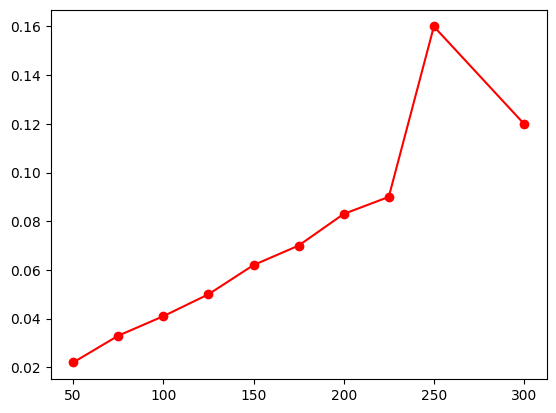

In [14]:
#plot the data
plt.ylabel('GSD')
plt.xlabel('UAV Height')
plt.title('UAV Height vs GSD')

depedent_variable=pd_data['GSD_m']
independent_variable=pd_data['Flight_Height_m']

plt.scatter(independent_variable,depedent_variable,color='red',marker='o')
plt.show()

plt.plot(pd_data['Flight_Height_m'],pd_data['GSD_m'],color='red',marker='o')
plt.show()


[ 50  75 100 125 150 175 200 225 300]
[0.022 0.033 0.041 0.05  0.062 0.07  0.083 0.09  0.12 ]


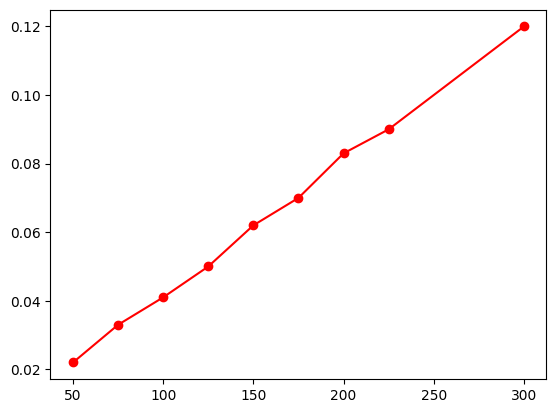

In [16]:
#data cleaning
height_cleaned=np.delete(independent_variable,8)
gsd_cleaned=np.delete(depedent_variable,8)
print(height_cleaned)
print(gsd_cleaned)
plt.plot(height_cleaned,gsd_cleaned,color='red',marker='o')
plt.show()


In [17]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(height_cleaned.reshape(-1,1),gsd_cleaned)

LinearRegression()

In [27]:
#save the model
import joblib
joblib.dump(linear_reg,'/content/drive/MyDrive/2025/ml_training/gsd_model.pkl')

['/content/drive/MyDrive/2025/ml_training/gsd_model.pkl']

In [19]:
#prediction, interpolation
predicted_gsd=linear_reg.predict([[55]])
print('The predicted GSD is:' +str(predicted_gsd))

The predicted GSD is:[0.02400307]


In [20]:
#accuracy value
accuracy=linear_reg.score(height_cleaned.reshape(-1,1),gsd_cleaned)
print('The accuracy of the model is:' +str(accuracy))

The accuracy of the model is:0.9986218072709162


In [21]:
# y=mx + c
m=linear_reg.coef_ #slope
c=linear_reg.intercept_ #intercept
print('The value of m is:' +str(m))
print('The value of c is:' +str(c))

The value of m is:[0.00039223]
The value of c is:0.0024301675977653828


In [22]:
#manual calculation
gsd=(m * 55) + c
print('The predicted GSD is:' +str(gsd))

The predicted GSD is:[0.02400307]


In [28]:
#load the saved model
loaded_model=joblib.load('gsd_model.pkl')

# Now you can use the loaded model to make predictions
predictions = loaded_model.predict([[55]])
print(predictions)


[0.02400307]
